## Artist Tag Collaboration Network

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
import os

In [2]:
artists = pd.read_csv('../data/hetrec2011-lastfm-2k/artists.dat', sep= '\t')
artists.head(5)

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [14]:
tags = pd.read_csv('../data/hetrec2011-lastfm-2k/tags.dat', sep = '\t', encoding = 'latin-1')
print(tags.shape)
tags.head(5)

(11946, 2)


,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


In [4]:
user_artists_tags = pd.read_csv('../data/hetrec2011-lastfm-2k/user_taggedartists-timestamps.dat', sep= '\t')
user_artists_tags.head(5)

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000
1,2,52,15,1238536800000
2,2,52,18,1238536800000
3,2,52,21,1238536800000
4,2,52,41,1238536800000


In [5]:
top_artists = pd.read_csv('../data/intermediate/top_artists.csv')
top_artists.head(5)

,artistID,artist_name
0,51,Duran Duran
1,55,Kylie Minogue
2,56,Daft Punk
3,59,New Order
4,65,Coldplay


In [6]:
temp1 = pd.merge(user_artists_tags[['artistID', 'tagID']].drop_duplicates(), 
                 tags, 
                 on = 'tagID', 
                 how = 'inner') # get tag name
print(temp1.shape)
temp2 = pd.merge(temp1, artists[['id','name']], 
                 left_on = 'artistID', 
                 right_on='id', 
                 how = 'inner').drop(['id'], axis = 1) # get artist name
print(temp2.shape)
temp3 = pd.merge(temp2, top_artists['artistID'], on = 'artistID', how = 'inner') # get top artists
temp3.head(5)

(109750, 3)
(108437, 4)


,artistID,tagID,tagValue,name
0,154,13,chillout,Radiohead
1,154,18,electronic,Radiohead
2,154,21,trip-hop,Radiohead
3,154,14,ambient,Radiohead
4,154,26,atmospheric,Radiohead


<img src="../data/images/tags.png"  width="500"/>|<img src="../data/images/artists.png"  width="500"/>



In [10]:
temp4a = pd.merge(temp3,temp3, on = 'tagID' )
temp5a = temp4a[temp4a['artistID_x'] != temp4a['artistID_y']][['name_x','tagValue_x','name_y']].drop_duplicates()
temp5a['cnt'] = temp5a.groupby(['name_x','name_y'])['tagValue_x'].transform('count')

(array([5.568e+03, 6.390e+03, 2.400e+03, 7.220e+02, 2.580e+02, 7.000e+01,
        4.800e+01, 1.600e+01, 2.000e+00, 8.000e+00]),
 array([  1. ,  11.1,  21.2,  31.3,  41.4,  51.5,  61.6,  71.7,  81.8,
         91.9, 102. ]),
 <a list of 10 Patch objects>)

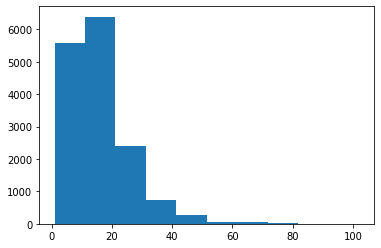

In [11]:
# temp5a[['name_x', 'name_y', 'cnt']].drop_duplicates().sort_values(['cnt'], ascending = False)
plt.hist(temp5a[['name_x', 'name_y', 'cnt']].drop_duplicates()['cnt'])

In [12]:
temp6a = temp5a[['name_x', 'name_y', 'cnt']].drop_duplicates()
temp6a_filtered = temp6a[temp6a['cnt']>20].reset_index(drop=True)

In [13]:
U = nx.Graph()
edge_list = list(zip(temp6a_filtered['name_x'], temp6a_filtered['name_y'], temp6a_filtered['cnt']))
U.add_weighted_edges_from(edge_list)
print(nx.info(U))

file_path = '../data/networkx graphs/artist_artist_1.gexf'
os.makedirs(os.path.dirname(file_path), exist_ok=True)

nx.write_gexf(U, file_path)

Name: 
Type: Graph
Number of nodes: 117
Number of edges: 1960
Average degree:  33.5043


<img src="../data/images/artist_artist.png" alt="drawing" width="800"/>